#####Импортирование библиотек.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#####Нахождение месяца с максимальным значением.

In [11]:
csv = pd.read_csv('IBM.csv', sep=';')
value_list = pd.Series(dtype=int)
sum = csv['<VOL>'][0]
for i in range(1, len(csv['<DATE>'])):
    if csv['<DATE>'][i][3:] == csv['<DATE>'][i-1][3:]:
        sum += csv['<VOL>'][i]
    else:
        value_list = value_list.append(pd.Series([sum], [csv['<DATE>'][i-1][3:]]))
        sum = csv['<VOL>'][i]
    if i == len(csv['<DATE>'])-1:
        value_list = value_list.append(pd.Series([sum], [csv['<DATE>'][i-1][3:]]))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(value_list)
print(f'Max = {max(value_list)} in {value_list.index[value_list == max(value_list)][0]}')

01.12     6676258
02.12     4598031
03.12     4623527
04.12     5952186
05.12     4443472
06.12     4536513
07.12     6526428
08.12     3449865
09.12     4635423
10.12     5906555
11.12     3559248
12.12     5020346
01.13     5480431
02.13     3880539
03.13     4452662
04.13     5931792
05.13     3042641
06.13     4609463
07.13     4059999
08.13     2863673
09.13     3351505
10.13     6019988
11.13     6493805
12.13     4757253
01.14     3757794
02.14     4392747
03.14     6260095
04.14     5021470
05.14     2840602
06.14     3327692
07.14     4143982
08.14     1591452
09.14     4930043
10.14     5270430
11.14     3325490
12.14     5177012
01.15    16640622
02.15     4105294
03.15     4938624
04.15     4115875
05.15     2184302
06.15     2763198
07.15     2825426
08.15     4681733
09.15     2883016
10.15     3408559
11.15     4041434
12.15     3306737
01.16     4943424
02.16     3944564
03.16     2993227
04.16     3474924
05.16     2658774
06.16     2558790
07.16     2591569
08.16     

Max = 16890450 in 03.20


#####Отрисовка графика в виде столбцовой диаграммы.

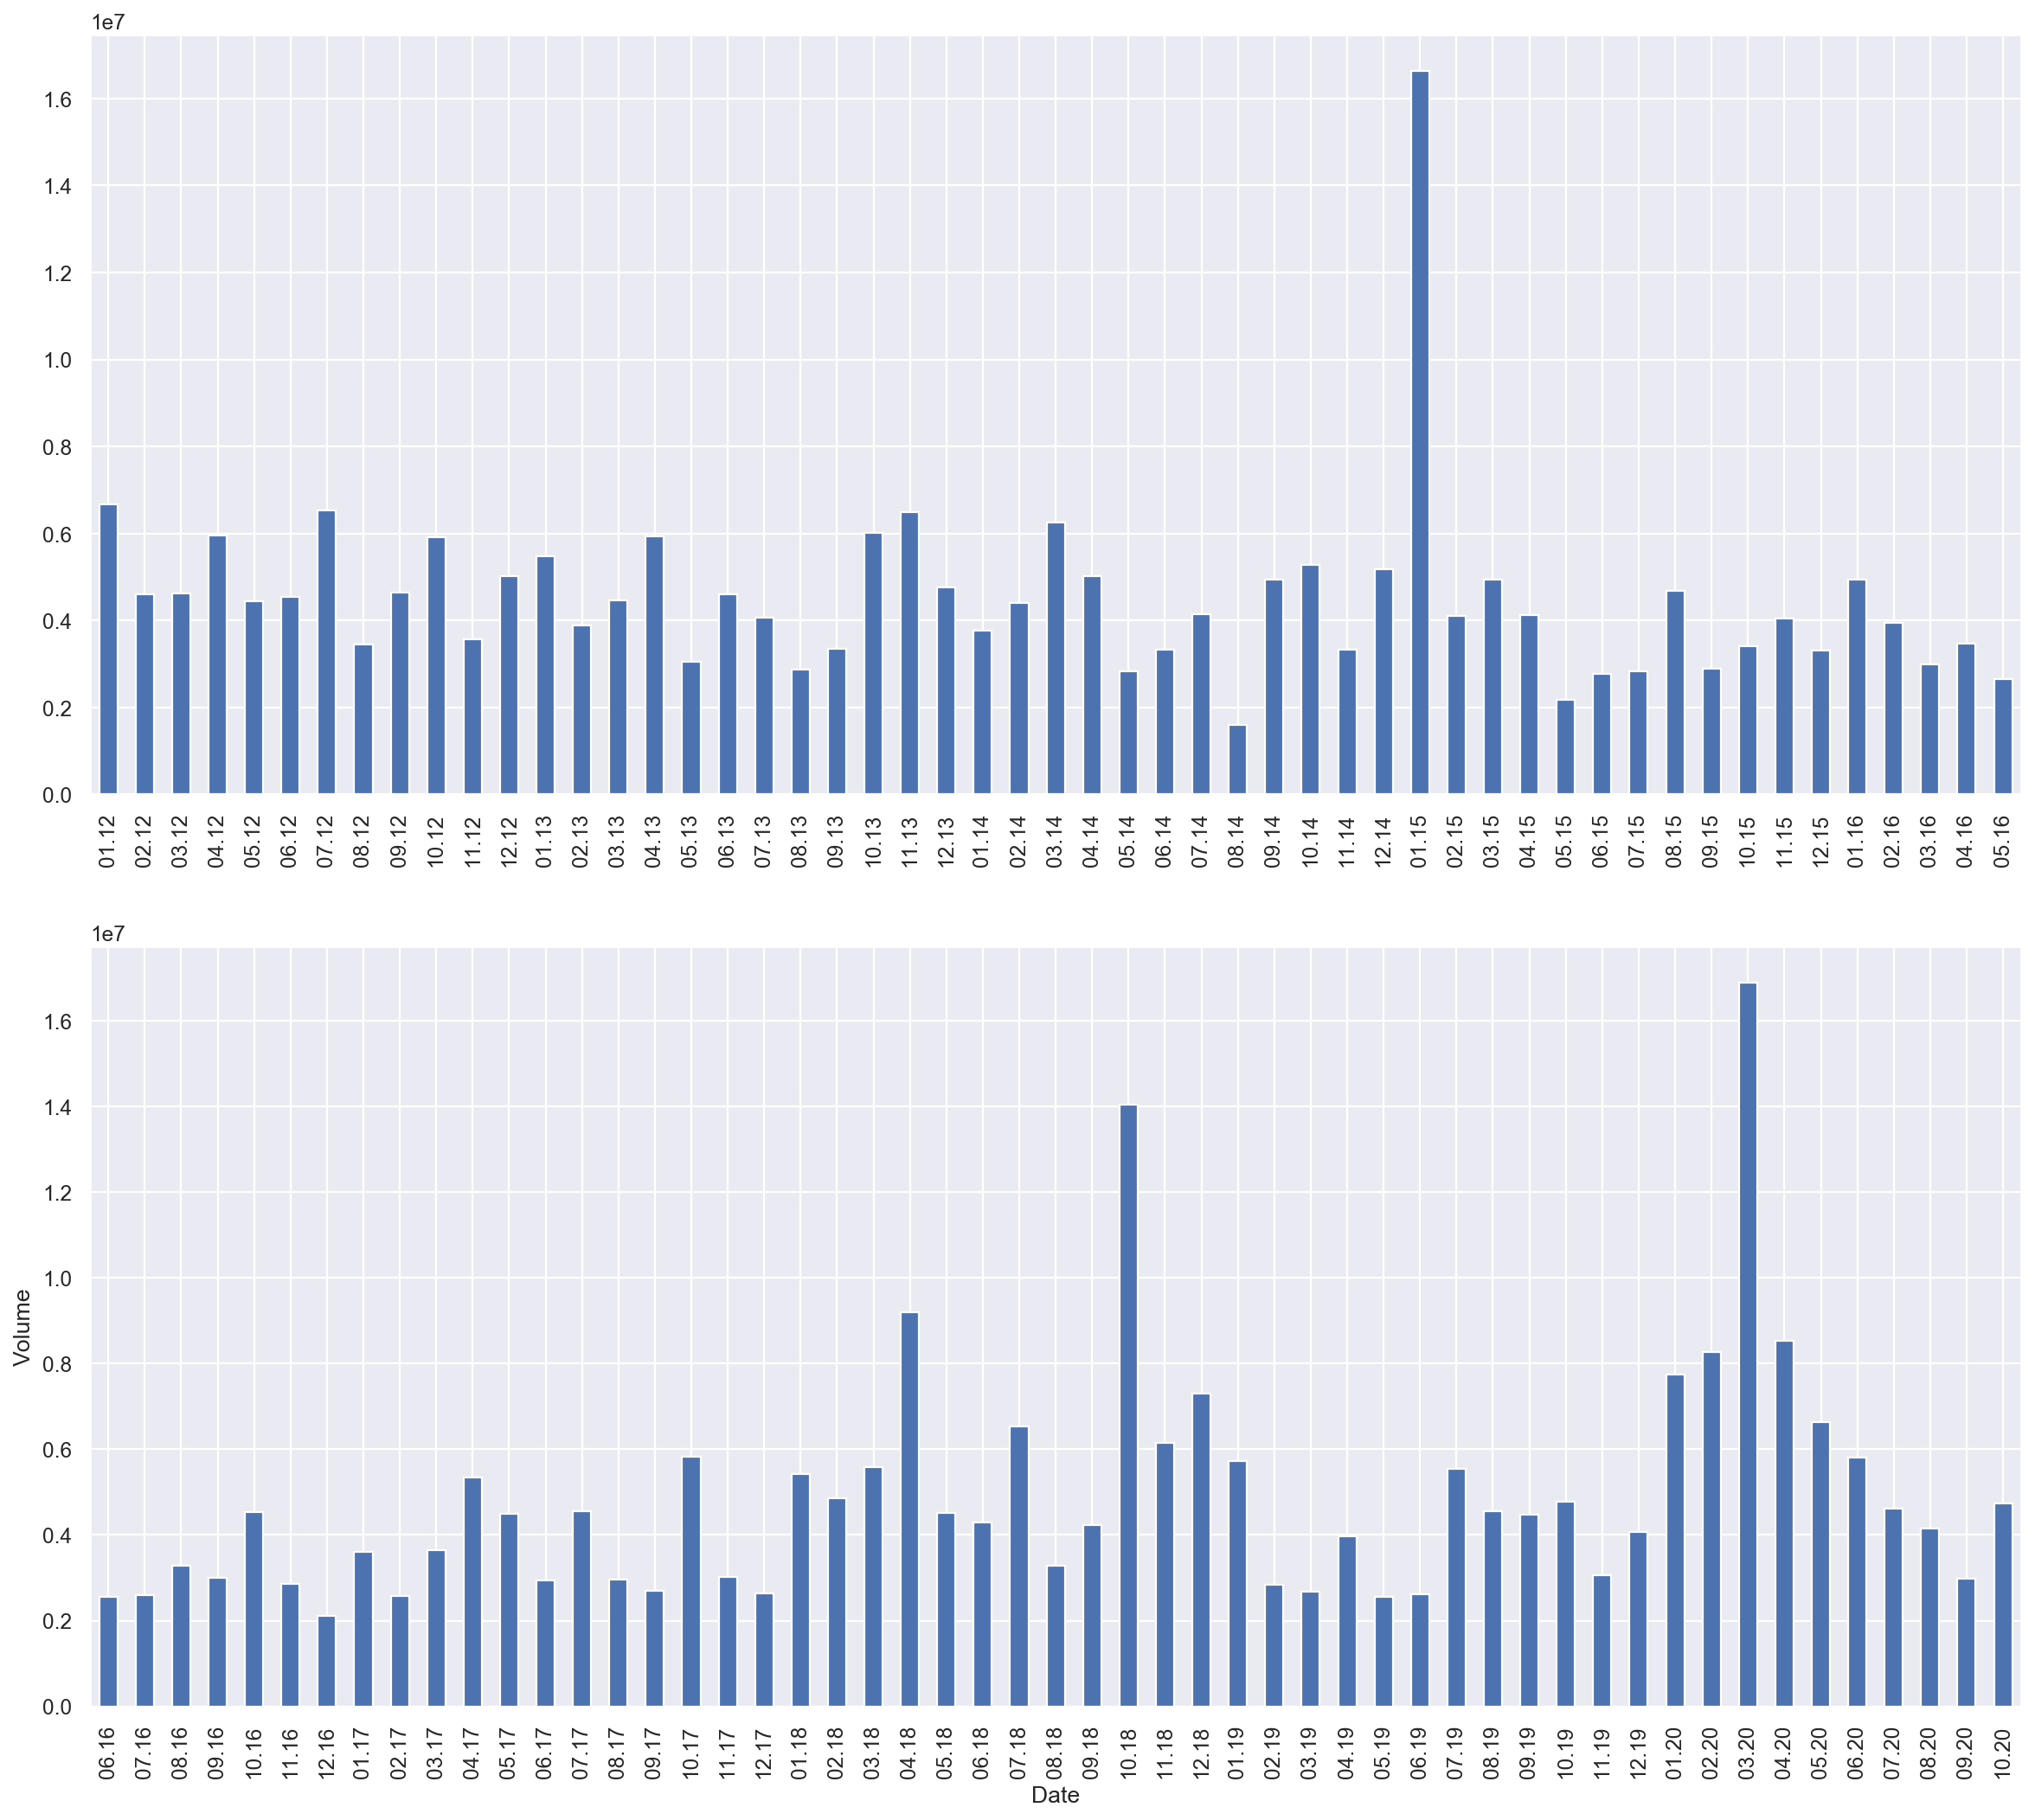

In [12]:
%matplotlib inline
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (18, 16), dpi= 160)
plt.xlabel('Date')
plt.ylabel('Volume')
value_list[0:int(len(value_list)/2)].plot(kind='bar', ax=axes[0])
value_list[int(len(value_list)/2):len(value_list)].plot(kind='bar', ax=axes[1])
plt.show()

######Cредняя цена акций на закрытии торгов по годам.

In [13]:
sum = csv['<CLOSE>'][0]
average_list = pd.Series(dtype=int)
count = 1
for i in range(1, len(csv['<CLOSE>'])):
    if csv['<DATE>'][i][6:] == csv['<DATE>'][i-1][6:]:
        count += 1
        sum += csv['<CLOSE>'][i]
    else:
        sum /= count
        average_list = average_list.append(pd.Series([sum], [csv['<DATE>'][i-1][6:]]))
        sum = csv['<CLOSE>'][i]
        count = 1
    if i == len(csv['<DATE>'])-1:
        sum /= count
        average_list = average_list.append(pd.Series([sum], [csv['<DATE>'][i-1][6:]]))
display(average_list)



12    196.579245
13    193.817885
14    181.863750
15    155.217451
16    150.711731
17    157.573654
18    142.910000
19    137.341346
20    124.650357
dtype: float64